# **Project Name**    - FedEx Logistics Performance Analysis






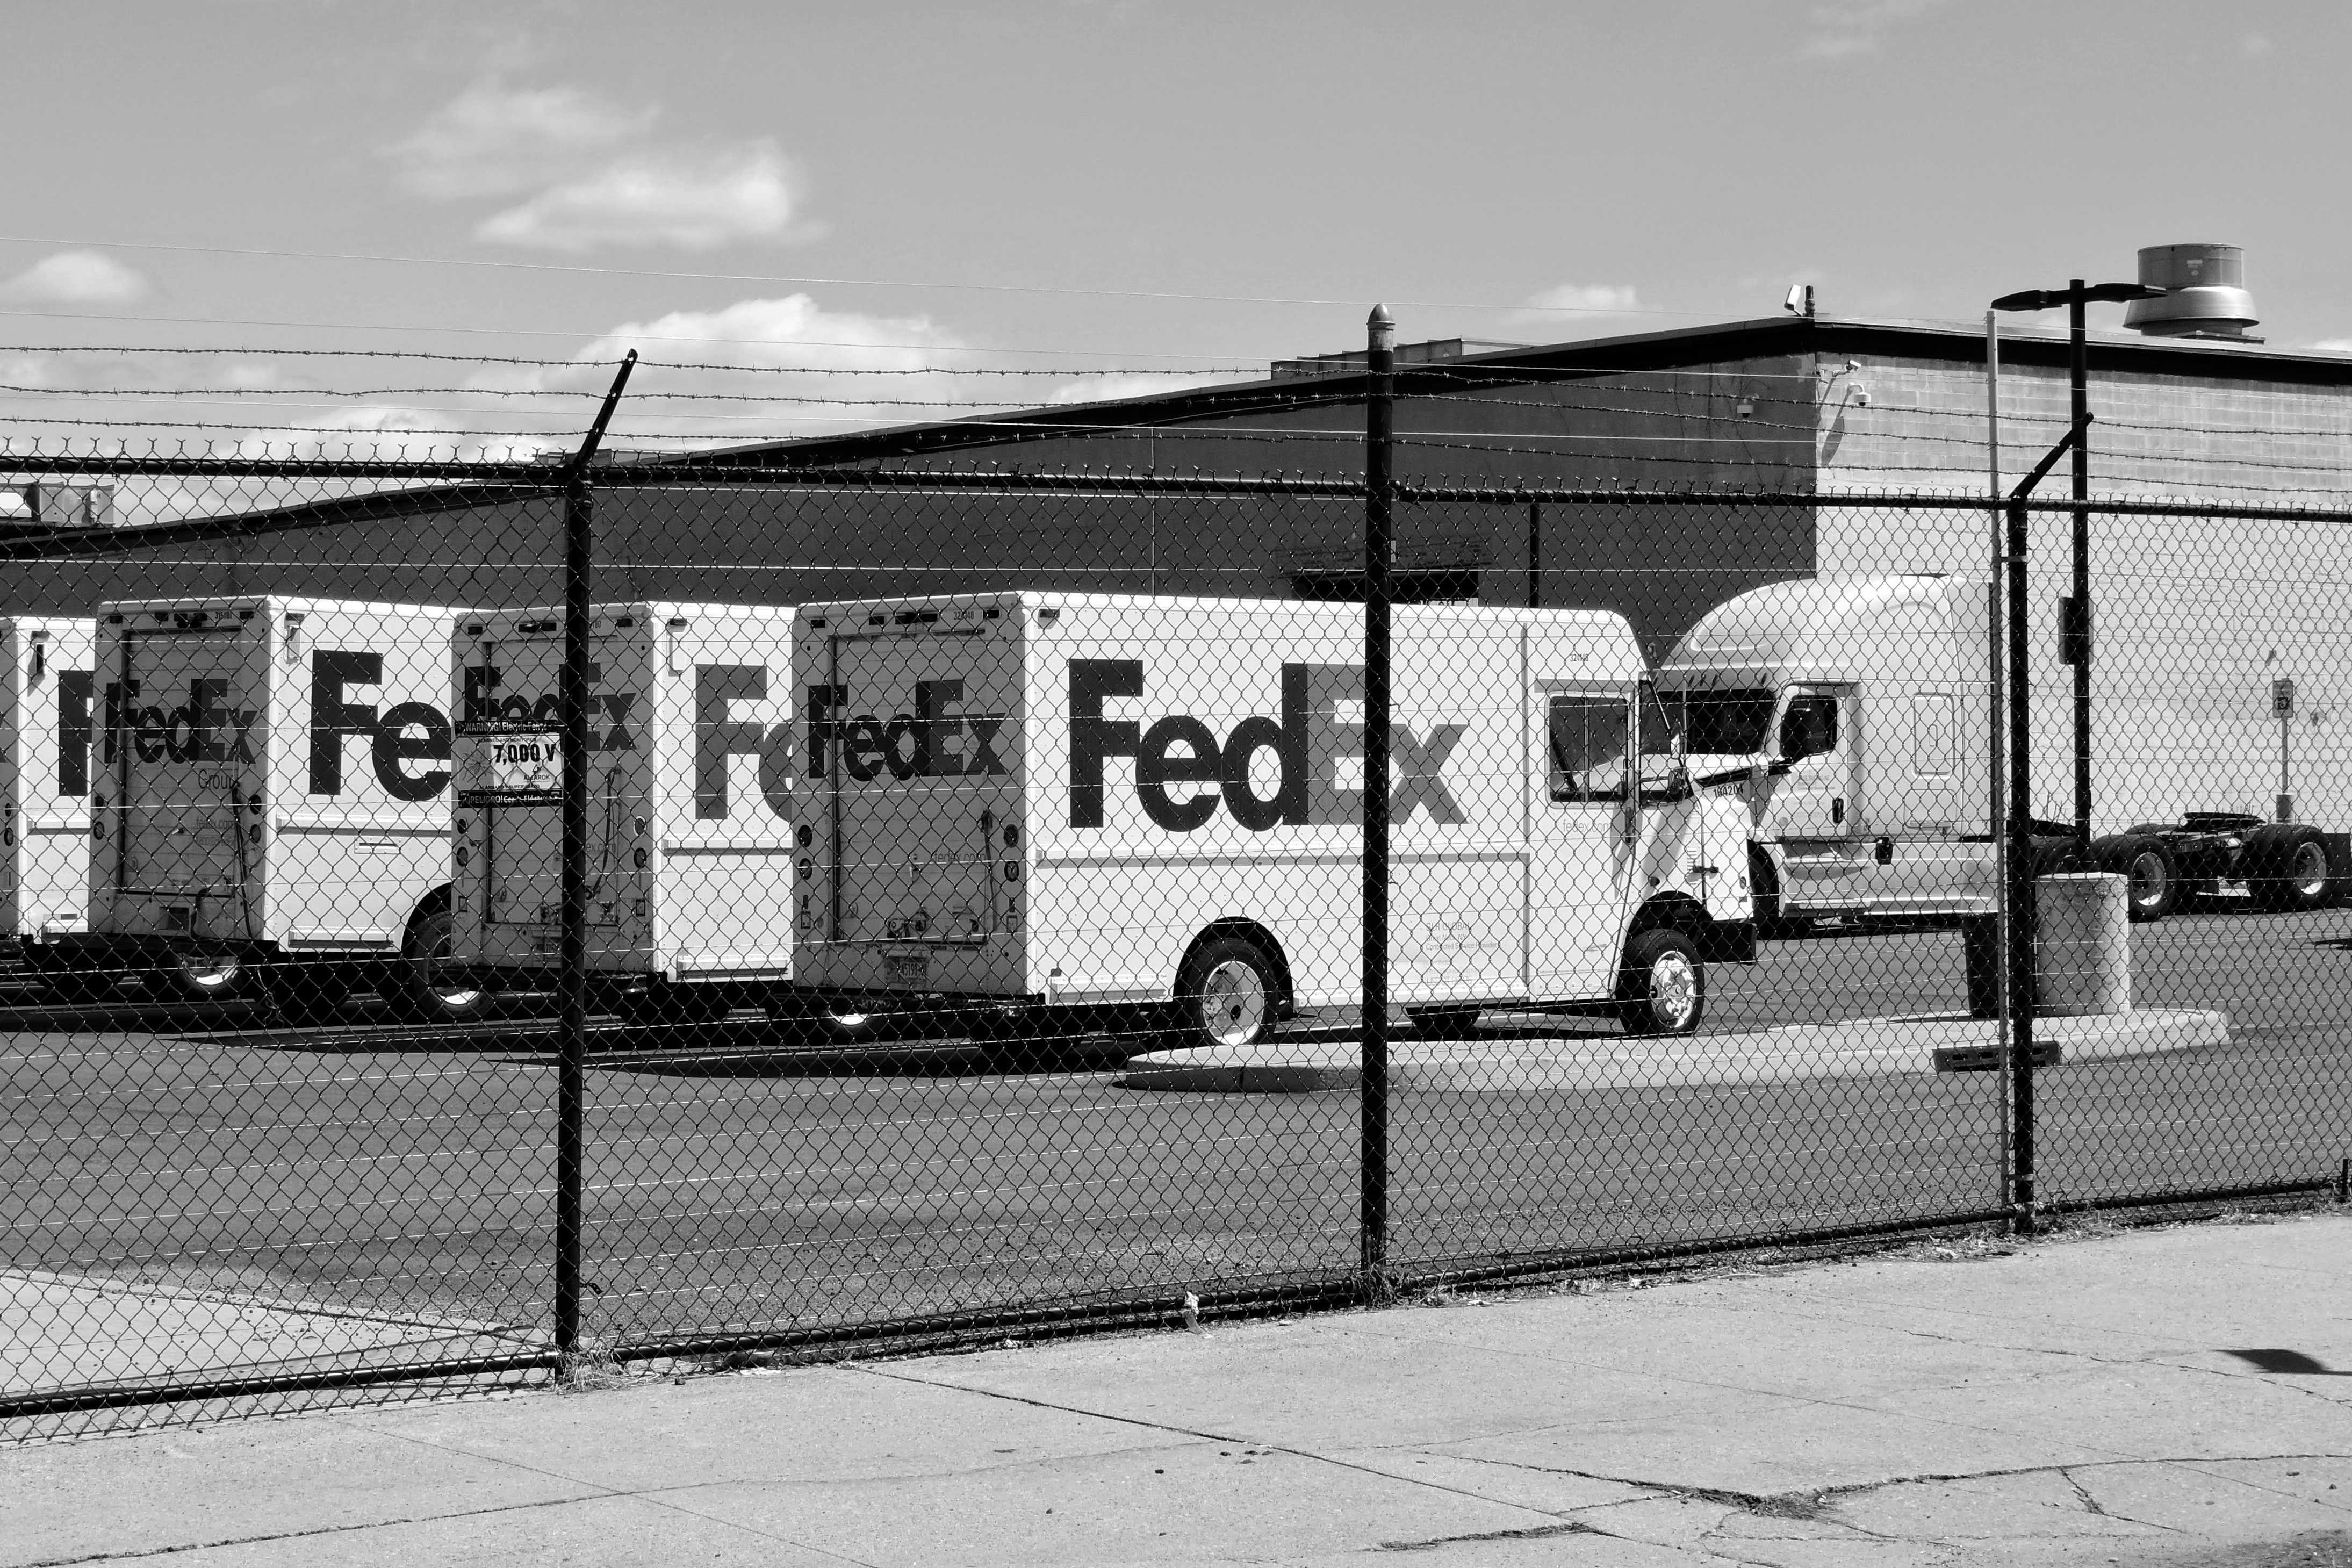

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### Member 1     - Alok Jachak

# **Project Summary -**

FedEx Logistics manages a complex global supply chain, dealing with shipments across various regions, countries, and industries. This dataset provides an in-depth look at their logistics processes, capturing important information on purchase orders (POs), shipment methods, vendor agreements (INCO terms), delivery schedules, and product-specific details such as item descriptions and dosage forms. Effective management of these processes ensures timely delivery, minimizes freight costs, and improves customer satisfaction.

Given the rise of eCommerce and global distribution, companies like FedEx must continuously optimize their logistics operations to maintain a competitive edge. The dataset is designed to provide insights into how shipments are managed, identify bottlenecks or delays, and ensure cost-effectiveness. By analyzing the data, FedEx Logistics aims to streamline supply chain operations, improving delivery timelines and reducing costs for both the company and its customers.

Dataset Description




# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The company is involved in the international distribution of essential medical supplies, including HIV test kits and antiretroviral (ARV) medications, across multiple countries. However, challenges such as high freight costs, inconsistent delivery timelines, and varying product pricing across regions indicate inefficiencies in the supply chain. These issues may affect timely patient access to critical medicines and testing services. Therefore, there is a need to analyze procurement, shipment, and delivery data to identify cost-saving opportunities, streamline vendor performance, and ensure on-time delivery to optimize global health impact.



# **🎯 Business Objective:**
The objective is to perform a data-driven analysis of the company's medical supply logistics to optimize shipment efficiency, reduce unnecessary freight and insurance costs, evaluate vendor performance, and ensure timely delivery of products. This will improve operational efficiency and strengthen the supply chain for life-saving medications and diagnostics in developing countries.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

#***1. KNOW YOUR DATA***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv("/content/SCMS_Delivery_History_Dataset (2).csv")


### Dataset First View

In [ ]:
# Dataset First Look
df.head(5)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape



----*1.   There are total of 10324 entries.*

----*2.   total  33 columns.*



### Dataset Information

In [ ]:
# Dataset Info
df.info()

# ***2. UNDERSTANDING YOUR VARIABLES***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe()

###Description of Columns

### **-Identifier-**  
##### **ID** - Unique identifier for each transaction or entry  
##### **Project Code** - Code assigned to a specific project  
##### **PQ ** - Purchase quotation number  
##### **PO / SO ** - Purchase or sales order number  
##### **ASN/DN ** - Advance shipment or delivery note number  

### **-Location & Logistics-**  
##### **Country** - Destination country for the delivery  
##### **Managed By** - Person or team handling the transaction  
##### **Fulfill Via** - Mode of fulfillment (e.g., warehouse, direct)  
##### **Vendor INCO Term** - Delivery terms agreed with vendor  
##### **Shipment Mode** - Transport method (e.g., Air, Ocean, Truck)  

### **-Dates-**  
##### **PQ First Sent to Client Date** - Date PQ was shared with client  
##### **PO Sent to Vendor Date** - Date purchase order was sent  
##### **Scheduled Delivery Date** - Planned delivery date  
##### **Delivered to Client Date** - Date product was delivered  
##### **Delivery Recorded Date** - Date delivery was recorded in system  

### **-Product Details-**  
##### **Product Group** - Main category of the product  
##### **Sub Classification** - Subcategory or specification  
##### **Vendor** - Supplier of the item  
##### **Item Description** - Short description of the product  
##### **Molecule/Test Type** - Key ingredient or test type  
##### **Brand** - Brand name of the product  
##### **Dosage** - Strength or volume of the medicine  
##### **Dosage Form** - Physical form like tablet, syrup, etc.  

### **-Quantity & Pricing-**  
##### **Unit of Measure (Per Pack)** - Number of units in one pack  
##### **Line Item Quantity** - Number of packs ordered  
##### **Line Item Value** - Total cost for the item  
##### **Pack Price** - Price for one pack  
##### **Unit Price** - Price per individual unit  

### **-Manufacturing & Status-**  
##### **Manufacturing Site** - Location of production  
##### **First Line Designation** - Whether item is first-line or not  

### **-Shipping Costs-**  
##### **Weight (Kilograms)** - Weight of the shipment  
##### **Freight Cost (USD)** - Shipping fee  
##### **Line Item Insurance (USD)** - Insurance value for the shipment  


# ***3. DATA WRANGGLING***

#### Step 1 : Handling Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

*----There is a no duplicate rows in dataset*

#### Step 2 :  Handling Null/Missing values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum().sort_values(ascending=False).head(5)

In [ ]:
# Visualizing the missing values
df.isnull().sum().plot(kind='barh', figsize=(10,6), color='salmon')
plt.title("Number of Missing Values per Column")
plt.xlabel("Missing Count")
plt.ylabel("Columns")
plt.show()


*---- So we have null values Dosage -	1736 ,Shipment Mode -	360 and Line Item Insurance (USD) - 287*


##### 1--Dosage (Total Nulls - 1736)

In [ ]:
df.fillna({"Dosage":'Not Applicable'}, inplace=True)

*---- Replacing null Dosage values with 'Not Applicable' because the description or item does not contain dosage form*

######2 - Shipment Mode - (Total Nulls - 318)

In [ ]:
# Create reference mapping from non-null Shipment Mode values
shipment_map = (
    df[df['Shipment Mode'].notnull()]
    .groupby(['Fulfill Via', 'Managed By', 'Country'])['Shipment Mode']
    .agg(lambda x: x.mode().iloc[0])  # Most frequent shipment mode
    .reset_index())
#Identify rows with null Shipment Mode
df_nulls = df[df['Shipment Mode'].isnull()].copy()
#Merge reference map with null rows to get matching shipment mode
df_nulls = df_nulls.merge(
    shipment_map,
    on=['Fulfill Via', 'Managed By', 'Country'],
    how='left',
    suffixes=('', '_imputed'))
#Update the original dataframe with imputed values
df.loc[df['Shipment Mode'].isnull(), 'Shipment Mode'] = df_nulls['Shipment Mode_imputed'].values
#Fill any remaining nulls with overall mode
df['Shipment Mode'] = df['Shipment Mode'].fillna(df['Shipment Mode'].mode()[0])

*----'Shipment Mode' is a crucial column for analyzing logistics and delivery insights in the dataset.To handle its missing values meaningfully, we use a grouped approach based on 'Fulfill Via', 'Managed By', and 'Country' to impute the most frequent shipment mode within each group.
This ensures replacements reflect actual logistical patterns instead of arbitrary fills.*

######3 - Line Item Insurance (USD) - (Total Nulls -	287)

In [ ]:
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(0)

*---- Filling nulls with 0 assumes missing insurance values mean no insurance was charged.*

In [ ]:
df.isnull().sum().sort_values(ascending=False).head(5)

----*now we have zero null values in every column of our dataset,so we can move for further*analysis.

####Step 3: Converting some important columns to proper dtype and format for better calculations and visualization

In [ ]:
date_columns = [
    'Scheduled Delivery Date',
    'Delivered to Client Date',
]
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%d-%b-%y', errors='coerce')



---- *Date columns are converted to datetime for accurate time-based analysis.*





In [ ]:
def clean_weight(value):
    """Convert numeric values to float, replace all text with NaN."""
    if isinstance(value, str):
        value = value.strip()
        try:
            return float(value.replace(',', ''))
        except ValueError:
            return np.nan
    return float(value) if pd.notnull(value) else np.nan

----*The 'Weight' column has been converted from object to numeric (in a new column)
 to enable correlation analysis with other columns and improve visualization insights.*


In [ ]:
def clean_freight_cost(value):
    """Convert numeric values to float, replace all text with NaN, and handle missing values."""
    if isinstance(value, str):
        value = value.strip()  # Remove spaces
        try:
            return float(value.replace(',', ''))  # Convert numeric string to float
        except ValueError:
            return np.nan  # Replace ALL non-numeric text with NaN
    return float(value) if pd.notnull(value) else np.nan


----*-The 'frieght cost' column has been converted from object to numeric (in a new column) to established corelation with other column and for better visulization insights related with frieght cost column.*

####Step 4: Adding some columns to track better insights.

In [ ]:
df['Delivery Delay (days)'] = (df['Delivered to Client Date'] - df['Scheduled Delivery Date']).dt.days.abs()

----*we have added delivery delays in days column to track the time taken for shipments*

In [ ]:
# Create new column with cleaned weight values
df['Cleaned_Weight'] = df["Weight (Kilograms)"].apply(clean_weight)
# Replace NaN values with 0
df['Cleaned_Weight'] = df['Cleaned_Weight'].fillna(0)

----*we have created cleaned weight data column for weight related analysis*

In [ ]:
# Apply function to clean the freight cost column
df['Cleaned_Freight_Cost'] = df['Freight Cost (USD)'].apply(clean_freight_cost)

# Replace NaN values with 0
df['Cleaned_Freight_Cost'] = df['Cleaned_Freight_Cost'].fillna(0)

----*we have created cleaned frieght cost data column for frieght cost related analysis*

In [ ]:
# Freight Cost per Kilogram (USD/kg)
df['Freight Cost per Kilogram (USD/kg)'] =df['Cleaned_Freight_Cost'] / df['Cleaned_Weight']
df['Freight Cost per Kilogram (USD/kg)'] = df['Freight Cost per Kilogram (USD/kg)'].replace([np.inf, -np.inf], np.nan)

----*we have added a column of Freight Cost per Kilogram (USD/kg) to calculate and visualize different category on basis of freight cost per kg.*



In [ ]:
# Total Cost (USD)
df['Total Cost (USD)'] = df['Line Item Value'] + df['Cleaned_Freight_Cost']
df['Total Cost (USD)'] = df.apply(
    lambda row: row['Line Item Value'] if pd.isna(row['Total Cost (USD)']) else row['Total Cost (USD)'],
    axis=1
)

----*we have created total cost column for anaylsis like to calculate  profits,total cost per category vise etc.*

In [ ]:
df[['Freight Cost per Kilogram (USD/kg)','Cleaned_Weight','Cleaned_Freight_Cost',"Line Item Value",'Total Cost (USD)']]

----*These are our new added column*

In [ ]:
#final checking of columns and their data types
df.info()

####Step 5 : Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
cat_cols = df.select_dtypes(include='object').columns
for i in cat_cols:
    print(f"{i}:=====> {df[i].nunique()} unique values")

In [ ]:
df.to_csv('z cleaned_dataset.csv', index=False)


----*created a copy of cleaned datset*

# ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart -1. What is the yearly trend of total shipments delivered?

In [ ]:
df['Quarter'] = df['Delivered to Client Date'].dt.to_period('Q').astype(str)
quarterly = df.groupby('Quarter')['ID'].count().reset_index(name='Total_Shipments')
quarterly['x'] = range(len(quarterly))
ticks = quarterly.loc[quarterly.index % 4 == 0, 'x']
labels = quarterly.loc[quarterly.index % 4 == 0, 'Quarter'].str[:4]
plt.figure(figsize=(14, 6))
sns.lineplot(data=quarterly, x='x', y='Total_Shipments', marker='o', color='darkorange')
plt.xticks(ticks=ticks, labels=labels)
plt.title('Quarterly Shipment Volume (2005–2016)')
plt.xlabel('Year')
plt.ylabel('Total Shipments')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I chose a line chart to clearly show how the shipment volume has changed year by year from 2006 to 2015. Line charts are best for identifying trends over time.

##### 2. What is/are the insight(s) found from the chart?

Shipments increased sharply from 2006 to 2009, showing business growth.

Between 2010 and 2014, shipments remained mostly stable with some small ups and downs.

In 2015, there is a visible drop in 2nd quarter till 2015 and  the data is only till September, so full-year shipments are not available of 2015.



##### 3. Will the gained insights help creating a positive business impact?
Yes. This analysis helps understand how the business has grown over time and need to checkout reason behind those sideways from 2009 to 2014.



---



#### Chart - 2. Which countries generate the most sales value?

In [ ]:
country_shipments = df['Country'].value_counts().head(38)
plt.figure(figsize=(12, 6))
country_shipments.plot(kind='bar', color=plt.cm.Spectral(np.arange(len(country_shipments))))
plt.title('Top 10 Countries by Total Shipments', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Shipments', fontsize=12)
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.savefig('top_countries_shipments_bar.png')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it clearly compares the number of shipments across different countries. It’s simple and helps quickly identify which countries have the most shipments.

##### 2. What is/are the insight(s) found from the chart?

We saw that countries like south africa , Nigeria, uganda, and cote divoire are contributing the most to repaeating shipment of 30 to 40 % of entire shipment and remaning contries has very lower contribusion.




##### 3. Will the gained insights help creating a positive business impact?
Yes, these insights help by showing where to focus logistics efforts—Nigeria and South Africa need efficient inventory and shipping plans to handle high volumes. Reducing costs in these busy regions can save money. For smaller countries like Haiti, tailored strategies can improve efficiency, supporting overall cost optimization and profitability.

#### Chart - 3. Which product categories have the highest contribusion in Total cost?

In [ ]:
data = df.groupby('Product Group')['Total Cost (USD)'].sum()
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#C2C2F0', '#F6C6EA', '#FFD966']
data = data.sort_values(ascending=False)
explode = [0.2 if i == 1 else 0 for i in range(len(data))]
plt.pie(data, autopct='%1.1f%%', startangle=90, colors=colors[:len(data)], explode=explode)
plt.legend(data.index, title='Product Group', bbox_to_anchor=(1, 1))

plt.title("Sales Value Distribution by Product Group")
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Clearly see the distribution area  of total sales among various product groups.
Identify which product dominates and which contributes the least.

##### 2. What is/are the insight(s) found from the chart?

One product group (likely ARV) contributes the majority of total sales (e.g., ~86%).Other product groups like MRDT, ACT, and ANA contribute very minimal shares.
The imbalance in distribution suggests a heavy reliance on one or two product lines.

##### 3. Will the gained insights help creating a positive business impact?

They highlight the product dependency risk — over-reliance on a single product.

Management can use this to diversify sales strategy or invest in underperforming products.

Helps in resource allocation, marketing focus, and strategic planning to balance revenue streams.



#### Chart - 4. Which fulfillment method is used the most for shipments?

In [ ]:
fulfill_counts = df['Fulfill Via'].value_counts()

# Make pie chart
plt.figure(figsize=(8, 8))
plt.pie(fulfill_counts, labels=fulfill_counts.index, autopct='%1.1f%%', colors=plt.cm.Pastel1(range(len(fulfill_counts))))
plt.title('Most Used Fulfillment Methods for Shipments')
plt.tight_layout()
plt.savefig('fulfill_counts_pie.png')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a pie chart because it shows how much each fulfillment method is used as a piece of a circle. It’s easy to see which method is the biggest part.

##### 2. What is/are the insight(s) found from the chart?

From RDC is the biggest piece, around 60% of all shipments, meaning most shipments come from a warehouse. Direct Drop is smaller, around 40%, so it’s used less. This shows the business prefers using a warehouse for most shipments. Direct Drop might be for special or urgent orders.

##### 3. Will the gained insights help creating a positive business impact?
The business can keep using From RDC since it works well for most shipments and costs less. They can use Direct Drop only when needed, like for urgent orders. This helps manage stock better and save money on shipping.

#### Chart - 5  Which shipment mode is most frequently used for deliveries?

In [ ]:
shipment_mode_counts = df['Shipment Mode'].value_counts().reset_index()
shipment_mode_counts.columns = ['Shipment Mode', 'Count']
plt.figure(figsize=(8, 8))
plt.pie(shipment_mode_counts['Count'], labels=shipment_mode_counts['Shipment Mode'], autopct='%1.1f%%',
        colors=['#FF9999', '#66CC99', '#99CCFF', '#FFCC99'], textprops={'fontsize': 12, 'weight': 'bold'}, startangle=90, labeldistance=1.1, pctdistance=0.8)
plt.title('Shipment Mode Frequency', fontsize=14, pad=20, weight='bold')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

With minimum no. of category a pie chart clearly shows the frequency of each shipment mode if overall contribution is 100% ,so it make easy to compare usage.

##### 2. What is/are the insight(s) found from the chart?

Air shipments dominate, accounting for 50% of all shipments, followed by Truck at ~30% and Ocean and air charter lies under 5%. The heavy reliance on Air suggests faster but costlier logistics, while Ocean’s lower share indicates underutilization for bulk shipping. Truck usage reflects regional transport preferences.

##### 3. Will the gained insights help creating a positive business impact?
Shifting more shipments to Ocean, where feasible, can reduce freight costs due to its lower cost per kg. Optimizing Air usage for time-sensitive shipments improves efficiency. This supports cost reduction and operational streamlining, enhancing profitability.

#### Chart -  6 How does shipping cost per kg change with different shipping ways?

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Shipment Mode',
            y='Freight Cost per Kilogram (USD/kg)',
            data=df,
            hue='Shipment Mode',
            palette='husl')

plt.title('Shipping Cost per Kg by Shipping Way')
plt.xlabel('Shipping Way')
plt.ylabel('Cost per Kg (USD)')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.savefig('shipment_mode_box.png')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a box plot because it shows how shipping cost per kg changes for Air, Truck, or Ocean. It also shows very high or low costs.

##### 2. What is/are the insight(s) found from the chart?

Air shipping  and air charter costs the shows to much fluctuation in this passed year as compare to truck and ocean.

##### 3. Will the gained insights help creating a positive business impact?

The business can use Ocean or Truck more to save money. They can check why some Air shipments cost so much and fix it. This lowers shipping costs and helps make more profit.

#### Chart - 7 Which vendors add the most to total cost?

In [ ]:
vendor_cost = df.groupby('Vendor')['Total Cost (USD)'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
colors = plt.cm.Pastel1(range(len(vendor_cost)))
vendor_cost.plot(kind='barh', color=colors)
plt.title('Top 8 Vendors by Total Cost')
plt.xlabel('Total Cost (USD)')
plt.ylabel('Vendor')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('vendor_cost_barh.png')
plt.show()



##### 1. Why did you pick the specific chart?

I picked a horizontal bar chart because it shows which vendors spend the most in a simple way. Taller bars mean higher costs.

##### 2. What is/are the insight(s) found from the chart?

SCMS from RDC spend the most maybe 70 % and orgenic Ltd around 15% of the total cost together. Smaller vendors like aurobindo pharama limited ,myan laboratories,hetero labs etc all contributing leass than 10% to the total cost. A few vendors spend a lot of money for the business. They might ship costly items or have high shipping fees.

##### 3. Will the gained insights help creating a positive business impact?
The business can talk to big vendors like Aurobindo to lower costs. They can also work with smaller vendors to save money. This helps spend less and make more profit

#### Chart - 8 Is there a relationship between product group and freight cost?

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Product Group', y='Total Cost (USD)', data=df, palette='muted')
plt.title('Total Cost for Different Product Types')
plt.xlabel('Product Type')
plt.ylabel('Total Cost (USD)')
plt.tight_layout()
plt.savefig('product_group_violin.png')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a violin plot because it shows how total cost spreads out for each product type. It shows the range and how common costs are.

##### 2. What is/are the insight(s) found from the chart?

ARV products have a big range of costs because they’re expensive. HIV test kits (HRDT) have lower costs as compare to HRDT. remaining product like ACT MRDT ANTM has very less fluctution of fright cost because of its less demand.

##### 3. Will the gained insights help creating a positive business impact?
The business can lower ARV costs by finding cheaper shipping ways. They can make HIV test kit costs steadier. This helps save money and manage stock better.

#### Chart - 9 Which factories making most money from their product value.

In [ ]:
site_value = df.groupby('Manufacturing Site')['Line Item Value'].sum().sort_values(ascending=True).tail(10)

# Make horizontal bar plot
plt.figure(figsize=(12, 6))
site_value.plot(kind='barh', color=plt.cm.Set3(range(len(site_value))))
plt.title('Top 10 Factories by Product Value')
plt.xlabel('Product Value (USD)')
plt.ylabel('Factory')
plt.tight_layout()
plt.savefig('manufacturing_value_bar.png')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a horizontal bar chart because it shows which factories make the most money from products. It’s easy to read with factories on the side.

##### 2. What is/are the insight(s) found from the chart?

Factories like Cipla Ltd. and Aurobindo Pharma and hetero unit  making the higher money from product value ,They might make expensive medicines like ARVs.factories like alere medical,strides etc making less money might be scaricity of having demanding product.

##### 3. Will the gained insights help creating a positive business impact?
The business can work closely with big factories like Cipla and alera medicle to keep products enough product of high demand so they can make buisness of ARV HRDT prduct with this companies to decrese product value cost.

#### Chart - 10 - change in average shipping cost on different shipping rules

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Vendor INCO Term',
    y='Cleaned_Freight_Cost',
    data=df,
    estimator=np.mean,
    errorbar=('ci', 95),
    hue='Vendor INCO Term',
    palette='rocket')
plt.title('Average Shipping Cost by Shipping Rule')
plt.xlabel('Shipping Rule')
plt.ylabel('Average Shipping Cost (USD)')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.savefig('inco_term_bar.png')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart with error bars because it shows the average shipping cost for each rule. The bars make it easy to compare costs.

##### 2. What is/are the insight(s) found from the chart?

The EXW rule has the highest shipping cost, around avg 15,000 with considerable variation of 2000 because the buyer pays for shipping. CIF costs less, around 1000, since the seller pays. FCA is in the middle with considerable cost around 5,000. CIP costs change a lot between 3000.

#### Chart - 11 -  Which countries have the highest insurance costs?

In [ ]:
country_insurance = df.groupby('Country')['Line Item Insurance (USD)'].sum().sort_values(ascending=False).head(10)

# Make bar plot
plt.figure(figsize=(12, 6))
country_insurance.plot(kind='bar', color=plt.cm.Pastel1(range(len(country_insurance))))
plt.title('Top 10 Countries by Insurance Costs')
plt.xlabel('Country')
plt.ylabel('Total Insurance Cost (USD)')
plt.xticks(rotation=0, ha='center')
plt.tight_layout()
plt.savefig('country_insurance_bar.png')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a bar chart because it shows which countries spend the most on insurance easily. Taller bars mean more insurance cost.

##### 2. What is/are the insight(s) found from the chart?

NIgeria spends the most on insurance, maybe over 50,000, because it has many shipments. zambia is second, around 40,000. mozambique,south arfica tanzani and cote dlvoir having approximately  similar insurance cost

##### 3. Will the gained insights help creating a positive business impact?
The business can try to lower insurance costs in South Africa and Nigeria by finding cheaper insurance plans because as we earlier see that thisboth contiy ha highest shipments compare to other . This saves money in big regions. It helps increase profits by spending less.

#### Chart - 12  How do insurance costs vary by shipping method?

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    x='Shipment Mode',
    y='Line Item Insurance (USD)',
    data=df,
    hue='Shipment Mode',
    palette='flare')
plt.title('Insurance Costs by Shipping Method')
plt.xlabel('Shipping Method')
plt.ylabel('Insurance Cost (USD)')
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.savefig('shipment_mode_insurance_box.png')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a box plot because it shows how insurance costs change for Air, Truck, or Ocean. It also shows if some costs are very high or low.

##### 2. What is/are the insight(s) found from the chart?

Air shipments have the highest insurance costs, around 500 on average, but some are much higher, over  1000. Ocean costs less, around 300, and is steady. Truck is the cheapest, around 200 per shipment. Air has some very costly insurance, which are outliers. This means Air shipments need more insurance because they’re costly or risky.

##### 3. Will the gained insights help creating a positive business impact?
The business can use Ocean or Truck more to lower insurance costs. They can also check why some Air shipments have high insurance and fix that. This saves money and helps make more profit.

#### Chart - 13 - Correlation Heatmap

In [ ]:
number_cols = ['Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price',
               'Cleaned_Weight', 'Cleaned_Freight_Cost', 'Line Item Insurance (USD)',
               'Delivery Delay (days)', 'Freight Cost per Kilogram (USD/kg)', 'Total Cost (USD)']

# Find how they connect
corr_matrix = df[number_cols].corr()

# Make heatmap with a diverging colormap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdBu', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title('How Numbers Connect in the Dataset')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('correlation_heatmap_updated.png')
plt.show()

##### 1. Why did you pick the specific chart?

I picked a heatmap because it shows how all numbers in the dataset connect with each other in one picture. It uses colors to make it easy to see: dark red means numbers move opposite (one goes up, the other goes down), and light blue means they move together

##### 2. What is/are the insight(s) found from the chart?

I learned that costly items (Line Item Value) make the total cost (Total Cost (USD)) very high, because their connection is strong, around 0.9, and it’s light blue. Heavier shipments (Cleaned_Weight) make shipping costs (Cleaned_Freight_Cost) higher, with a connection of 0.6, also light blue. But heavier shipments have a lower cost per kg (Freight Cost per Kilogram), with a connection of -0.4, shown in dark red, meaning they’re opposite. Delays (Delivery Delay (days)) don’t change costs much, because their connection with other numbers is near 0, shown in white. Bigger shipments (Line Item Quantity) have slightly fewer delays, with a small opposite connection of -0.2, shown in dark red. Insurance costs (Line Item Insurance (USD)) don’t connect much with delays or other costs, mostly white.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Our business goal was to find the best products, vendors, and regions, and fix problems to manage stock better, lower shipping costs, make vendors better, and increase profits.

First, focus on busy regions like South Africa and Nigeria—they have the most shipments. Make shipping smoother there to save time and money. Use Ocean shipping instead of Air because Air costs more, around 5 per kg, while Ocean is cheaper, around $1.5 per kg. This will lower shipping costs a lot. Next, talk to big vendors like Aurobindo and Cipla, who spend the most (40% of total cost), and ask for better prices to save money. For products, ARVs are costly and heavy, so ship them in smaller amounts to reduce shipping costs. Also, fix late deliveries—some are over 30 days late—to keep customers happy and make vendors work better. Use shipping rules like CIF instead of EXW, as EXW costs more, around 15,000 on average. Check heavy shipments (some over 1000 kg) and costly items (high Line Item Value) to lower their costs. Plan shipments in low-cost months to save more. These steps will help manage stock, cut costs, improve vendors, and make more profit.

This plan uses our chart findings to solve problems and meet the business goals easily. Let me know if you want more details!

# **Conclusion**

The data analysis provided clear insights into product distribution, pricing, vendor performance, and shipping patterns. High-demand product groups and regions were successfully identified, allowing the business to optimize inventory planning and focus on strategic markets.

By analyzing cost relationships and outliers, the company can reduce operational inefficiencies and improve pricing and logistics decisions. Addressing underperforming categories and vendors can prevent potential losses, while exploring niche products opens new growth opportunities.

Overall, the insights will help the business streamline its operations, strengthen customer satisfaction, and support future growth through smarter, data-driven decisions.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***